<a href="https://colab.research.google.com/github/glmoo7git/self-Project/blob/master/linecraftAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [ ]:
file = r'/content/drive/My Drive/glm.ar.iitm/pre placement preparation /linecraft/train.csv'
df = pd.read_csv(file, error_bad_lines = False)

In [ ]:
df.head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-01-01 00:41:00.0000003,6.2,2009-01-01 00:41:00 UTC,-73.994202,40.751008,-73.985817,40.750577,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                79999 non-null  object 
 1   fare_amount        79999 non-null  float64
 2   pickup_datetime    79999 non-null  object 
 3   pickup_longitude   79999 non-null  float64
 4   pickup_latitude    79999 non-null  float64
 5   dropoff_longitude  79999 non-null  float64
 6   dropoff_latitude   79999 non-null  float64
 7   passenger_count    79999 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 4.9+ MB


In [ ]:
df['key']=pd.to_datetime(df['key'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['date_time'] = df['key'].dt.date

In [ ]:
ts_low_jun = pd.to_datetime('2011/6/1')
ts_high_jun = pd.to_datetime('2011/7/31')

In [ ]:
df = df.loc[df['key']>=ts_low_jun,:]
df = df.loc[df['key']<=ts_high_jun,:]

In [ ]:
df_jun_jul = df.copy()
df_jun_jul.drop(['key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [ ]:
df_jun_jul['date_time']=pd.to_datetime(df_jun_jul['date_time']) 
df_jun_jul['YEAR'] = df_jun_jul['date_time'].dt.year
df_jun_jul['MONTH'] = df_jun_jul['date_time'].dt.month
df_jun_jul['DAY'] = df_jun_jul['date_time'].dt.day
df_jun_jul['hour'] = df_jun_jul['pickup_datetime'].dt.hour 

In [ ]:
df_jun_jul['M-D'] = df_jun_jul['MONTH'].astype(str)+'-'+df_jun_jul['DAY'].astype(str)
df_jun_jul.tail()


,fare_amount,pickup_datetime,passenger_count,date_time,YEAR,MONTH,DAY,hour,M-D
39857,12.5,2011-07-30 22:54:00+00:00,3,2011-07-30,2011,7,30,22,7-30
39858,11.7,2011-07-30 23:33:13+00:00,2,2011-07-30,2011,7,30,23,7-30
39859,4.5,2011-07-30 23:51:00+00:00,1,2011-07-30,2011,7,30,23,7-30
39860,6.1,2011-07-30 23:51:00+00:00,2,2011-07-30,2011,7,30,23,7-30
39861,6.5,2011-07-30 23:54:00+00:00,1,2011-07-30,2011,7,30,23,7-30


In [ ]:
import seaborn as sns

#1. frequency distribution of *fare_amount*

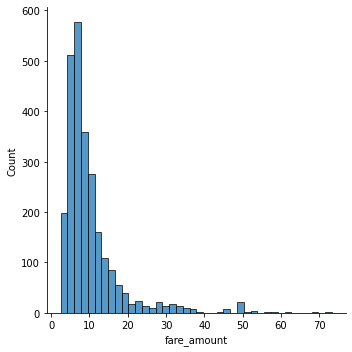

In [ ]:
sns.displot(df_jun_jul['fare_amount'],kde=False,bins=40)

#2. calculation for mean and mode of passenger_count

In [ ]:
mode = df_jun_jul['passenger_count'].mode()

In [ ]:
mean = df_jun_jul['passenger_count'].mean()

In [ ]:
print('Mean = '+ str(mean))
print('Mode = '+ str(mode[0]))

Mean = 1.6772300469483568
Mode = 1


#3 calculation for average of the number of rides per day

In [ ]:
index =[]
for i in range(len(df_jun_jul['date_time'])):
    index.append(i)
df_jun_jul['index']= index
df_jun_jul.set_index('index',inplace=True)
df_jun_jul.head()

,fare_amount,pickup_datetime,passenger_count,date_time,YEAR,MONTH,DAY,hour,M-D
index,,,,,,,,,
0,15.3,2011-06-01 00:23:45+00:00,1,2011-06-01,2011,6,1,0,6-1
1,4.5,2011-06-01 03:39:48+00:00,1,2011-06-01,2011,6,1,3,6-1
2,5.3,2011-06-01 05:47:25+00:00,1,2011-06-01,2011,6,1,5,6-1
3,4.9,2011-06-01 07:31:00+00:00,1,2011-06-01,2011,6,1,7,6-1
4,30.9,2011-06-01 07:52:00+00:00,5,2011-06-01,2011,6,1,7,6-1


In [ ]:
earn_interval={'0-4': 0, '4-8':0, '8-12': 0, '12-16': 0, '16-20':0, '20-24':0}
for i in range(len(df_jun_jul['hour'])):

    if df_jun_jul.loc[i,'hour']<=4:
        earn_interval['0-4'] += df_jun_jul.loc[i,'passenger_count']

    if df_jun_jul.loc[i,'hour']>4 and df_jun_jul.loc[i,'hour']<=8:
        earn_interval['4-8'] +=df_jun_jul.loc[i,'passenger_count']
    
    if df_jun_jul.loc[i,'hour']>8 and df_jun_jul.loc[i,'hour']<=12:
        earn_interval['8-12'] +=df_jun_jul.loc[i,'passenger_count']

    if df_jun_jul.loc[i,'hour']>12 and df_jun_jul.loc[i,'hour']<=16:
        earn_interval['12-16'] +=df_jun_jul.loc[i,'passenger_count']

    if df_jun_jul.loc[i,'hour']>16 and df_jun_jul.loc[i,'hour']<=20:
        earn_interval['16-20'] +=df_jun_jul.loc[i,'passenger_count']

    if df_jun_jul.loc[i,'hour']>20 and df_jun_jul.loc[i,'hour']<=24:
        earn_interval['20-24'] +=df_jun_jul.loc[i,'passenger_count']

In [ ]:
earn_interval

{'0-4': 531,
 '12-16': 836,
 '16-20': 1063,
 '20-24': 729,
 '4-8': 392,
 '8-12': 736}

In [ ]:
total_in_interval = pd.DataFrame({'interval': ['0-4','4-8','8-12','12-16','16-20','20-24'], 'totlal_ride': [531,392,736,836,1063,729]})
total_in_interval


,interval,totlal_ride
0,0-4,531
1,4-8,392
2,8-12,736
3,12-16,836
4,16-20,1063
5,20-24,729


In [ ]:
import plotly.express as px
fig = px.bar(total_in_interval,x='interval',y='totlal_ride',title='ride on interval',)
fig.show()

time 16-20 has most number of rides


In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('gulam.ipynb')